<a href="https://colab.research.google.com/github/proaro2001/LearningPyTorch/blob/main/01_pytorch_workflow_video_jpynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTroch Workflow

Let's explore an example PyTroch end-to-end workflow.

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.jpynb
* Book version of notebook - https://www.learningpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [128]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [129]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networkst
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

**torch.nn**: https://pytorch.org/docs/stable/nn.html

## 1. Data (preparing and loading)

Data can be almost anything ... in machine learning.
* Excel spreadsheet ( row and col )
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text


Machine learning is a game of two parts:
1. Get data into a numberical representataion
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [130]:
# Create *known* parameters
weight = 0.7    # slope
bias = 0.3      # constant

# Create
start = 0
end = 1
step = 0.02
X = torch.arange( start, end, step ).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10],len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

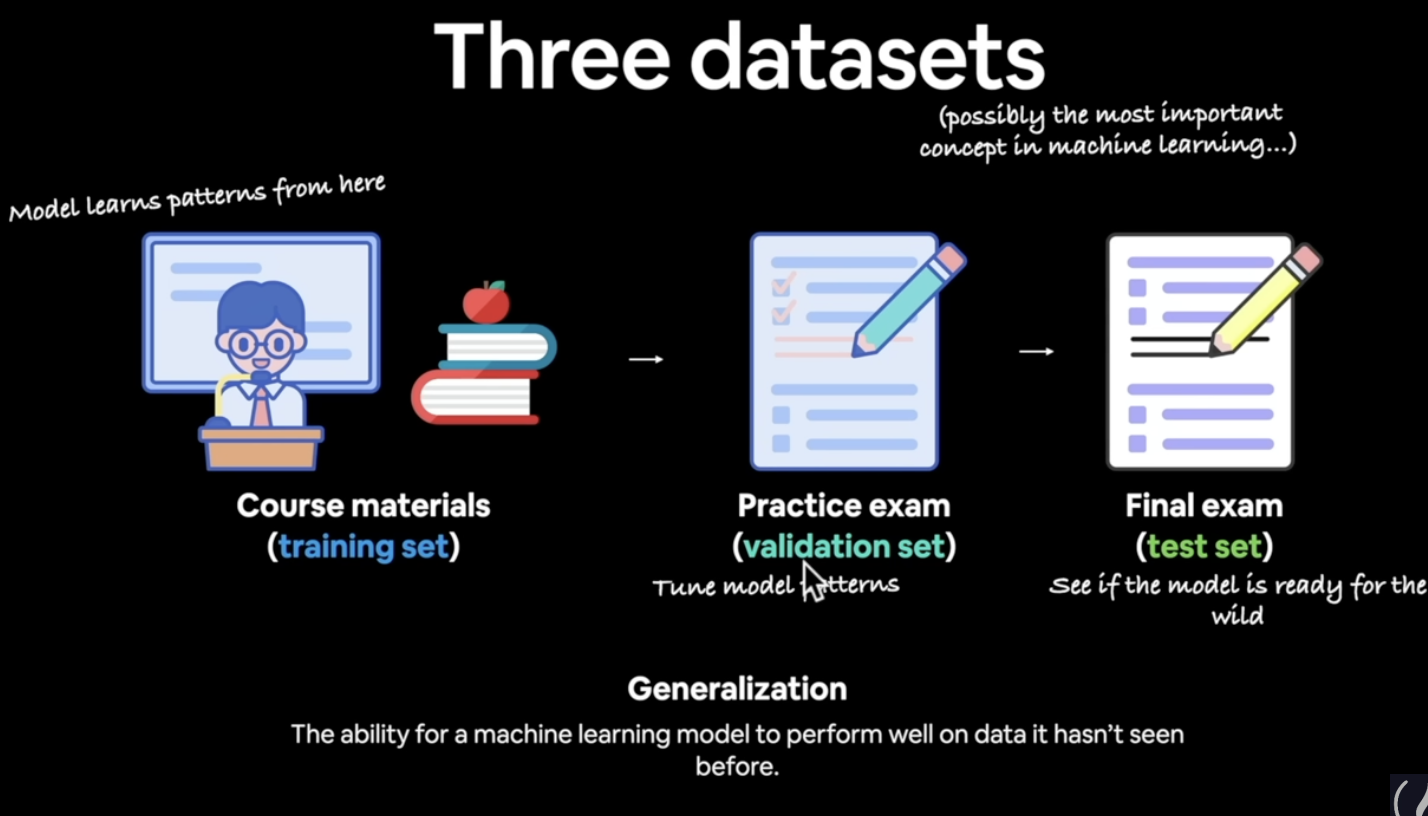

Three datasets for ML
* Training set
* validation set
* test set

Training set is the materials you fed

Validation set is the materials for your test

Test set is the materials from unknown input



---


Now Let's create a training and test set with our data.


In [131]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [132]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in?

"Visualize, visualize, visualize!"

In [133]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [134]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Traububg data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4,label="Predictions")

  # Show the legend
  # legend is gonna show the labels on the map plot
  plt.legend(prop={"size":14})

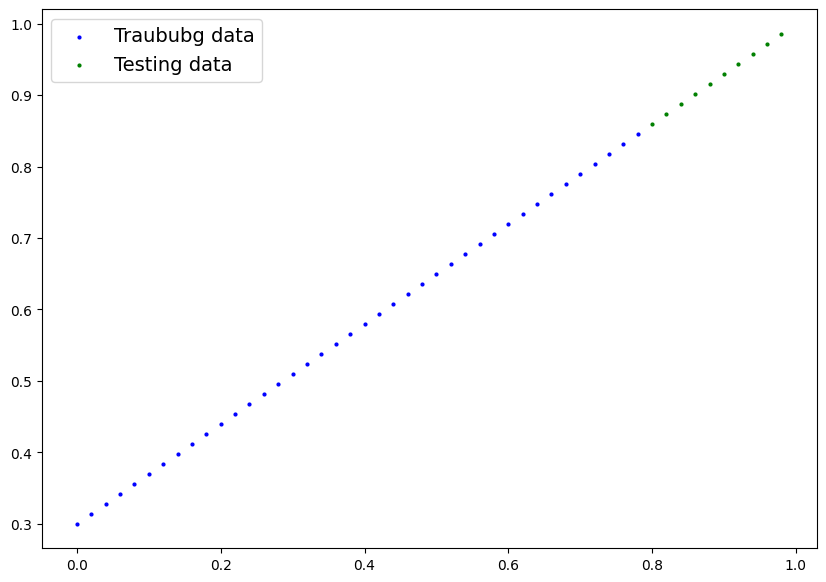

In [135]:
plot_predictions()

## 2. Build model

Our first PyTorch model!!

Python classes: https://realpython.com/python3-object-oriented-programming

nn.modules: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

Through two main algorithms:
1. Gradient descent - https://youtu.be/IHZwWFHWa-w

2. Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [136]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  # almost everything in PyTorhc inherits from nn.Module
  # nn stands for neural network
  # more info for nn.Module https://pytorch.org/docs/stable/generated/torch.nn.Module.html
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via gradient descent
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad=True, # <- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

    # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    # <- "x" is the input data
    return self.weights * x + self.bias


### PyTroch model building essentials
---
* torch.nn - contains all of the buildings for computational graphs(another word for neural networks; a neural network can be considered as a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The bas class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method definds what happens in the forward computation

### Checking the contents of our PyTorch model

---

Now we've created a model, let's see what's inside

So we can check our model parameters or what's inside our model using .parameters().

In [137]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# Check out the parameters
model_0, model_0.parameters(), list(model_0.parameters())

(LinearRegressionModel(),
 <generator object Module.parameters at 0x78d402b3f840>,
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [138]:
# demonstrate the importance of manual_seed for replicating the value for educational purpose
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [139]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [140]:
weight, bias

"""
Question asked in the video in 5:29:00:
"How did the 'weights' and 'bias' gets from '0.3367' and '0.1288'
to '0.7' and '0.3'?
"""

'\nQuestion asked in the video in 5:29:00:\n"How did the \'weights\' and \'bias\' gets from \'0.3367\' and \'0.1288\'\nto \'0.7\' and \'0.3\'?\n'

### Making prediction using 'torch.inference_mode()

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it's going to run it through the `forward()` method

In [141]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [142]:
y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [143]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

### **What is the inference_mode?**
---
It turns off the gradient tracking which means it means that it disable all the useful things that helps in the training process

### **What's the benefit of turning off the gradient tracking?**
---
PyTorch behind the scence is keeping track of leess data, which means the calculations will be faster in a large data set because there won't be a lot of data to be tracked.

### See more on inference mode here
https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cKav09iTgwQ-rfri6u7PQ

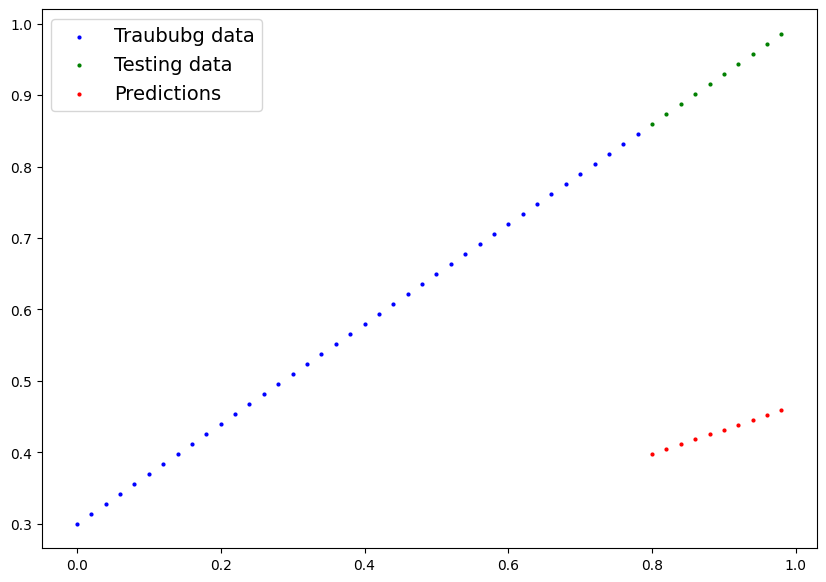

In [144]:
"""
  We are expecting the red dots (predictions) to be right
on top of the green dots. However, the graph shows our expectation
is wrong.
  The reason the red dots behave like this is because we initalize
our parameters with random numbers.
"""

plot_predictions(predictions=y_preds)

In [145]:
# Update on the previous code

# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something sililar with torch.no_grad(). However,
# torch.inference_mode() is prefered
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

### 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters ( these may be random ) to some *known* paramters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

These are the same thing:
* Loss functions
* Criteria
* Cost functions

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight, bias in our case) to improve the loss function.
https://pytorch.org/docs/stable/optim.html

  * Inside the optimizer you'll often have to set two parameters
    * `params` - the model parameters you'd like to optimize, for example `params=model_0.parameters()`
    * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [146]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [147]:
# Check out our model's parameters
# (a parameter is a value that the model set itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [148]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 # lr = learning rate = possible the most important hyperparameter you can set
                            )

In [149]:
loss_fn

L1Loss()

**Q:** Which loss function and optimizer should I use?
---

**A:** That will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to uuse a loss function of `nn.BCELoss()` (binary cross entropy loss)

### **L1Loss function**
L1Loss function is the built-in function to measure the mean absolute error of red and green dots

### **stochastic gradient descent**
---
keep adjusting ( increase/decrease ) the parameters to find the right move to reduce the loss, and stop until this action no longer lead to decrease in loss.

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of nn.BCELoss() (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

---

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backwards - move backwards through the netork to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=tleHLnjs5U8
)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent** - https://www.youtube.com/watch?v=IHZwWFHWa-w)

In [150]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [151]:
"""
with torch.inference_mode():
  list(model_0.parameters())
"""
model_0.eval().parameters()

<generator object Module.parameters at 0x78d402b3cc80>

In [152]:
# An epoch is one loop through the data ... ( this is a hyperparameter because we've set it ourselves)
epochs = 1

### Training
# 0. Loop through the data
for epochs in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  # the order of parameters of loss_fn is (input, target)
  loss = loss_fn(y_pred, y_train)
  # value of loss gets smaller means it's more accurate
  print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimzer changes will acculumate throught the loop so... we have to zero them above in step 3 for the next iteration of the loop


  # Testing
  # model_0.eval()



Loss:0.31288138031959534


**Terms:**
---

Learning rate scheduling

Convergence, the bottom point of the curve



In [153]:
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))]),
 0.7,
 0.3)

In [154]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

### **Steps to build and train a model:**
---

In [155]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [156]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [157]:
# use X_test data to generate the output of y_preds
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [158]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

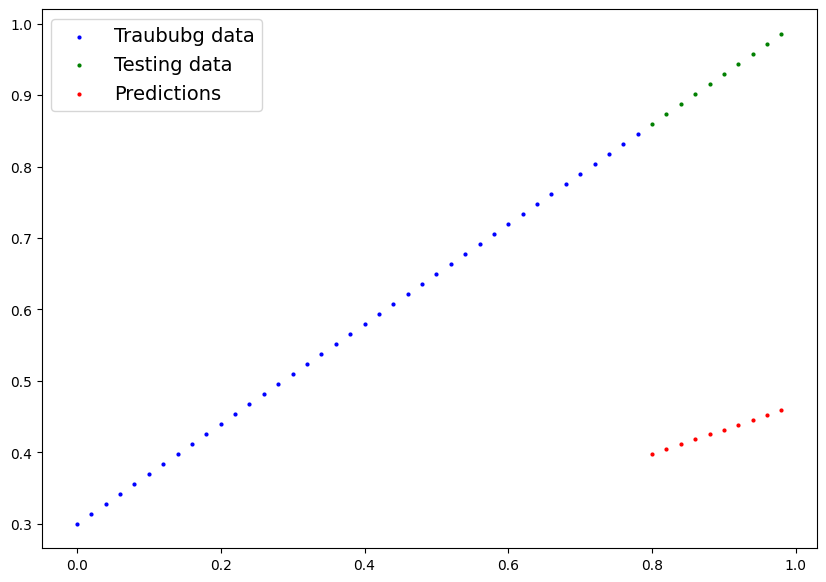

In [159]:
# Lets first look at how poor our previous predictions are
plot_predictions(predictions=y_preds)

In [160]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 # lr = learning rate = possible the most important hyperparameter you can set
                            )

In [161]:
torch.manual_seed(42)

# An epoch is one loop through the data ... ( this is a hyperparameter because we've set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epochs in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  # the order of parameters of loss_fn is (input, target)
  loss = loss_fn(y_pred, y_train)
  # value of loss gets smaller means it's more accurate
  print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimzer changes will acculumate throught the loop so... we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  # model_0.eval()

Loss:0.31288138031959534
Loss:0.3013603389263153
Loss:0.28983935713768005
Loss:0.2783183455467224
Loss:0.26679736375808716
Loss:0.2552763521671295
Loss:0.24375534057617188
Loss:0.23223432898521423
Loss:0.22071333229541779
Loss:0.20919232070446014
Loss:0.1976713240146637
Loss:0.18615034222602844
Loss:0.1746293306350708
Loss:0.16310831904411316
Loss:0.1515873372554779
Loss:0.14006635546684265
Loss:0.1285453587770462
Loss:0.11702437698841095
Loss:0.1060912236571312
Loss:0.09681284427642822
Loss:0.08908725529909134
Loss:0.08227583020925522
Loss:0.07638873159885406
Loss:0.07160007208585739
Loss:0.06747635453939438
Loss:0.06395438313484192
Loss:0.06097004935145378
Loss:0.05845819041132927
Loss:0.05635259300470352
Loss:0.0545857772231102
Loss:0.053148526698350906
Loss:0.05181945487856865
Loss:0.05069301277399063
Loss:0.0498228520154953
Loss:0.04895269125699997
Loss:0.04819351062178612
Loss:0.047531817108392715
Loss:0.04692792519927025
Loss:0.04642331600189209
Loss:0.04591871052980423
Loss:0.0

In [162]:
# Lets' make some prediction after train our model a couple times
with torch.inference_mode():
  y_preds_new = model_0(X_test)

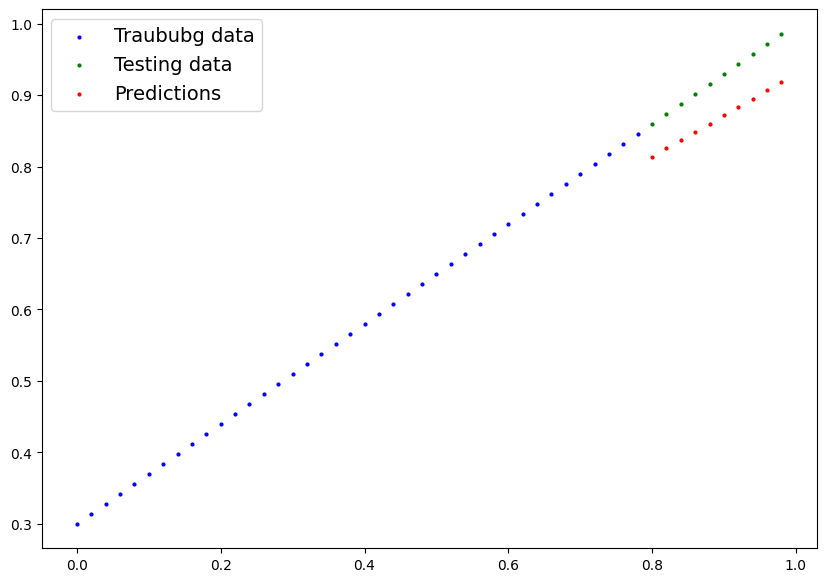

In [163]:
# Now lets looks at the graph of the trained model
plot_predictions(predictions=y_preds_new)

In [164]:
weight, bias

(0.7, 0.3)

### **Testing Code**
---


In [165]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [166]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01 # lr = learning rate = possible the most important hyperparameter you can set
                            )

In [167]:
torch.manual_seed(42)

# An epoch is one loop through the data ... ( this is a hyperparameter because we've set it ourselves)
epochs = 200

# Create empty lists for storing useful values (helpful for tracking model progress)
# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epochs in range (epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch set all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  # the order of parameters of loss_fn is (input, target)
  loss = loss_fn(y_pred, y_train)
  # value of loss gets smaller means it's more accurate
  # print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimzer changes will acculumate throught the loop so... we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)

  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # you may also see torch.no_grad() in older PyTorch code

    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epochs % 10 == 0:
      epoch_count.append(epochs)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epochs} | Loss: {loss} | Test loss: {test_loss}")
      print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [168]:
# Lets' make some prediction after train our model a couple times
with torch.inference_mode():
  y_preds_new = model_0(X_test)

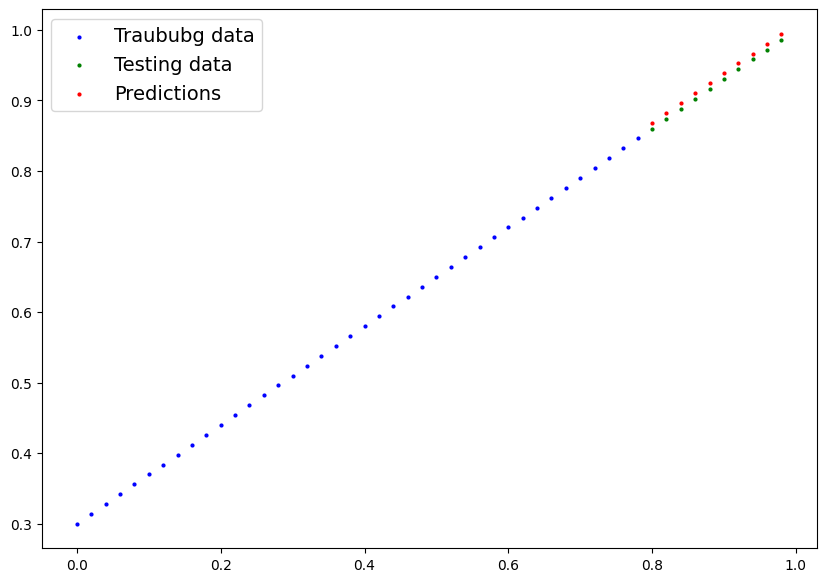

In [169]:
# Now lets looks at the graph of the trained model
plot_predictions(predictions=y_preds_new)

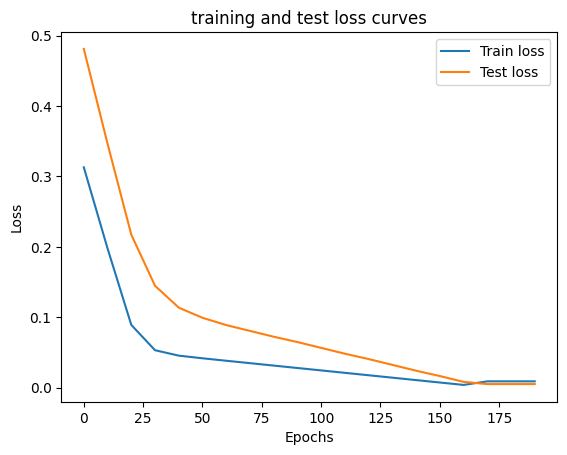

In [170]:
# Plot the loss curves
import numpy as np

# Notice that the loss_values is still tensor but not numpy
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch
---
There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in [`Python's pickel`](https://docs.python.org/3/library/pickle.html) format

2. `torch.load()` - allows you load a saved PyTorch object

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

[`PyTorch save & load code tutorial + extra curriculum`](https://pytorch.org/tutorials/beginner/saving_loading_models.html)


In [171]:
# Experiment of checking the state dictionary
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [172]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
# it can give our model a name
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
"""
Q: Why we need to save the state dict?
A: Because it is recommended
"""
print(f"MODEL_SAVE_PATH is {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH is models/01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

---

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [173]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [174]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [175]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [176]:
# Make some predictions with our loaded model

loaded_model_0.eval() # turn on for speeding up a little bit

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [177]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [178]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

---

Let's go back through the steps above and see it all in one place.

In [179]:
# Importing PyTorch
import torch                      # PyTorch library
from torch import nn
import matplotlib.pyplot as plt   # for ploting

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [180]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cuda


### 6.1 Data

---

In [181]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
# X is features, and Y is labels
X = torch.arange( start, end, step ).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [182]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [183]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions.
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4,label="Predictions")

  # Show the legend
  # legend is gonna show the labels on the map plot
  plt.legend(prop={"size":14})

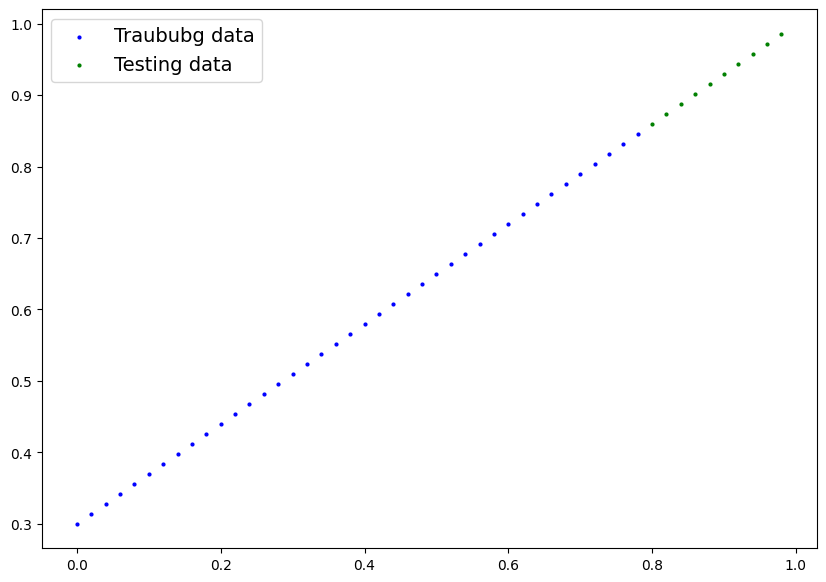

In [184]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a model
---
- [PyTorch Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
  - Parameters:
    - `in_features (int)` – size of each input sample
    - `out_features (int)` – size of each output sample
    - `bias (bool)` – If set to False, the layer will not learn an additive bias. Default: True
  - `nn.Linear` is creating parameters like `weight` and `bias` for us behind the scense.
  - use `self.linear_layer(x)`, the `nn.Linear` object, to do the forward method

In [185]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [186]:
# Set the manual seed
torch.manual_seed(42)
# Create model_1
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [187]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [188]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training
---
For training, we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [189]:
from torch.autograd.grad_mode import inference_mode
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# Let's write a training loop
torch.manual_seed(42)   # random seet

epochs = 200

# Put data on the target device (device agnostic code for data)
# Try to comment out the following and you get a device error
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass ( Calculate the prediction )
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [190]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [191]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating prediction
---


In [192]:
# Turn the model into evaluation mode
model_1.eval()

# Make prediction on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

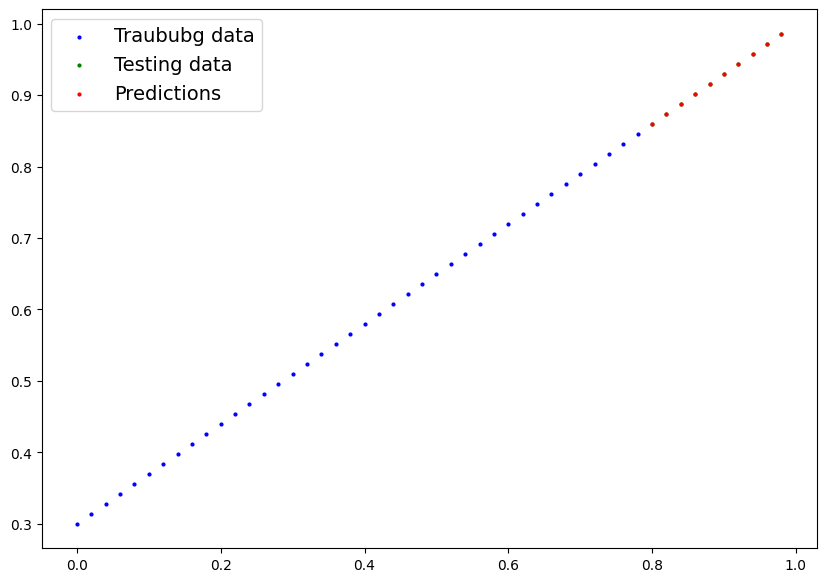

In [194]:
# Check out our model prediction visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model
---

In [199]:
from pathlib import Path

# Save a model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [205]:
# Load a model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [208]:
# Do an evaluation
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_preds_1 = loaded_model_1(X_test)

loaded_model_preds_1 == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercie & Extra Curriculum


# LearningPyTorch

Welcome to the LearningPyTorch Project! This project is designed to showcase my learning journey in [PyTorch](https://pytorch.org/) by following and watching YouTube tutorials from [freeCodeCamp](https://www.freecodecamp.org/). In this repository, you will find the code, documentation, and resources related to the tutorials I have explored.

# Project Description
The primary objective of this project is to showcase my understanding of PyTorch. Currently, the project primarily focuses on the fundamentals of using PyTorch for linear regression, where I have gained proficiency in implementing regression models and predicting outcomes based on given input data.

Moving forward, I am actively expanding my knowledge to include the exciting domain of neural network classification.

# Getting Started
To get started with this project, follow these steps:
1. Sign in to your Google account.
2. Open the Jupyter Notebook file.
Click on the "Open in Colab" button at the top of the Jupyter Notebook file.
3. Review the code and instructions in the notebook.
4. Execute the code using the shortcut Shift+Enter or Ctrl+F9 to run all the code and observe the results within the notebook interface.